In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('PCS_TEST_DETERMINSTIC (2).xls')

In [3]:
df.isna().sum()

Arrival no             0
Arrival time (sec)     0
Base station           0
Call duration (sec)    0
velocity (km/h)        0
dtype: int64

In [4]:
df.describe()

,Arrival no,Arrival time (sec),Base station,Call duration (sec),velocity (km/h)
count,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,6838.187985,10.54220,109.835901,120.072098
std,2886.89568,3955.015689,5.78662,99.138916,9.019058
min,1.00000,0.000000,1.00000,10.003952,86.423152
25%,2500.75000,3401.852699,6.00000,38.777914,113.892676
50%,5000.50000,6803.665666,11.00000,79.937560,120.021618
75%,7500.25000,10257.006519,16.00000,148.109589,126.188008
max,10000.00000,13696.799448,20.00000,1239.836192,151.501467


In [5]:
df['inter-arrival time'] = [0] *10000
for i, x in enumerate(df['Arrival time (sec)']):
    if i > 0:
        df.loc[i, 'inter-arrival time'] = df['Arrival time (sec)'][i]- df['Arrival time (sec)'][i-1]
    else:
        df.loc[i, 'inter-arrival time'] = df['Arrival time (sec)'][i]

count    10000.000000
mean         1.369680
std          1.343925
min          0.000000
25%          0.407751
50%          0.961107
75%          1.891770
max         12.498550
Name: inter-arrival time, dtype: float64


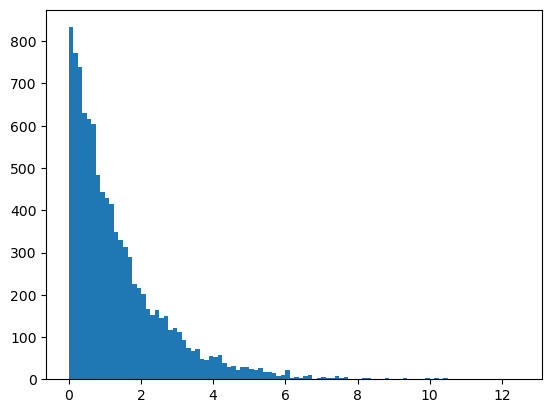

In [6]:
fig = plt.figure()
print(df['inter-arrival time'].describe())
plt.hist(df['inter-arrival time'], bins = 100)
plt.show()

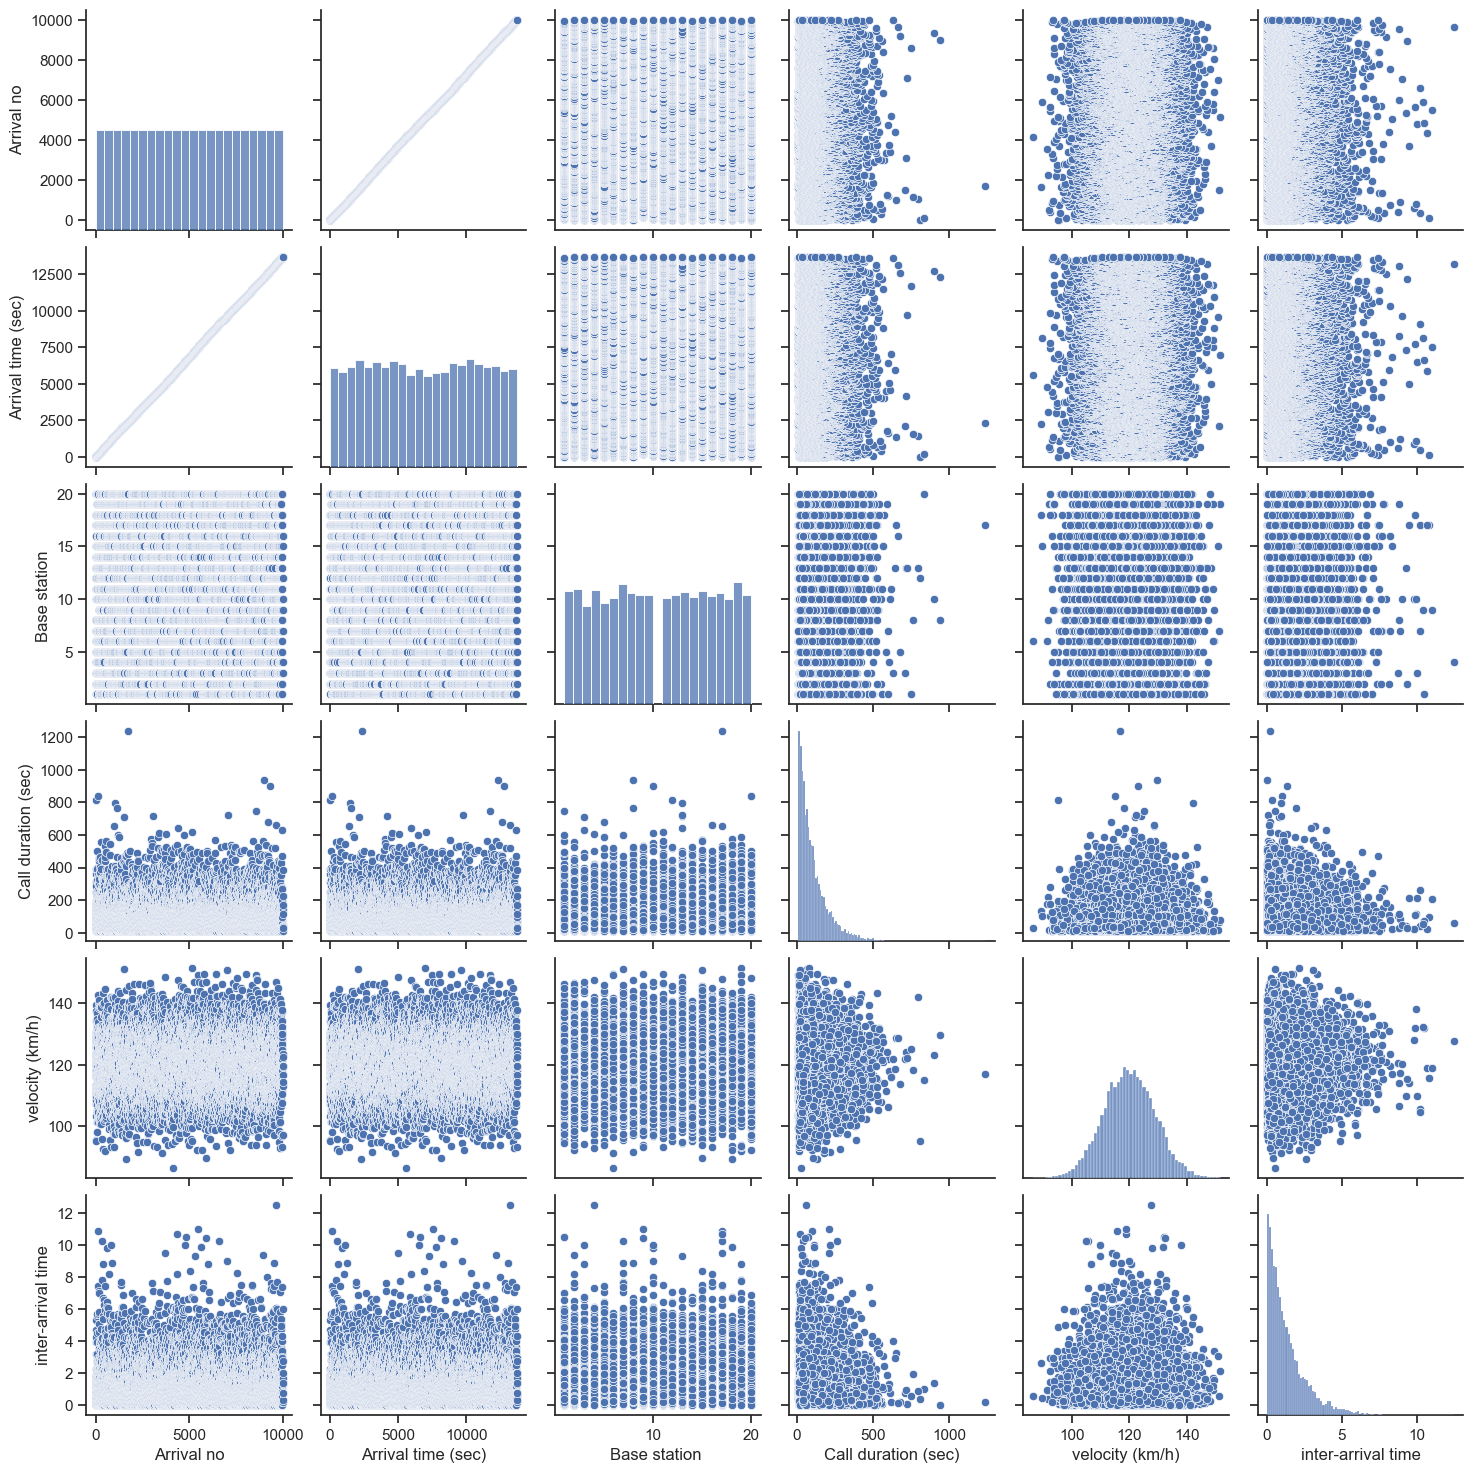

In [7]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df)

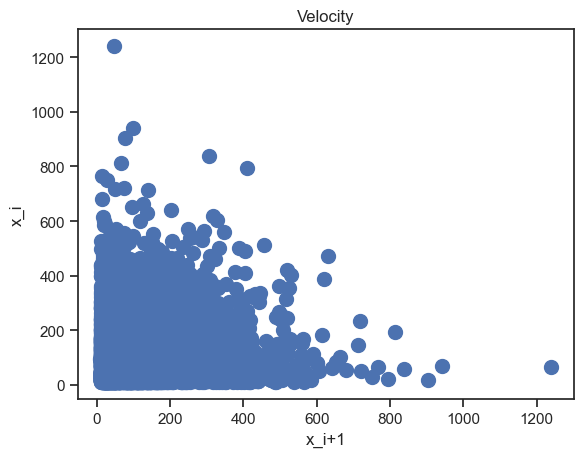

In [8]:
#Assessing Independence
plt.title('Velocity')
plt.xlabel('x_i+1')
plt.ylabel('x_i')
plt.scatter(x= df.iloc[:-1,3:4], y= df.iloc[1:,3:4], s = 100)
plt.show()

In [9]:
from statistics import mean
import math

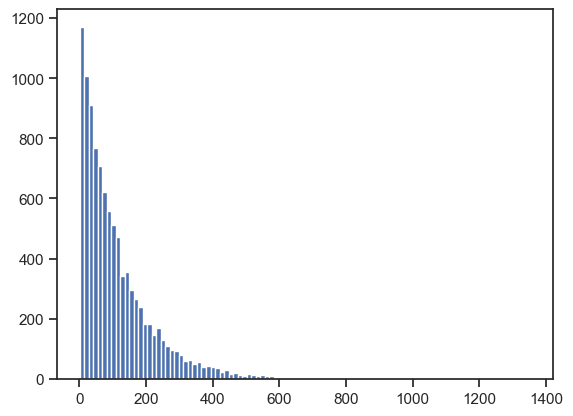

In [10]:
df['Call duration (sec)']
#for i, x in enumerate(df['Call duration (sec)']):
#    if x < 80:
#        x = x - df['Call duration (sec)'].min()
#    df.loc[i, 'Call duration (sec)'] = x
plt.hist(1.1*(df['Call duration (sec)'])- min(df['Call duration (sec)']), bins=100)
plt.show()

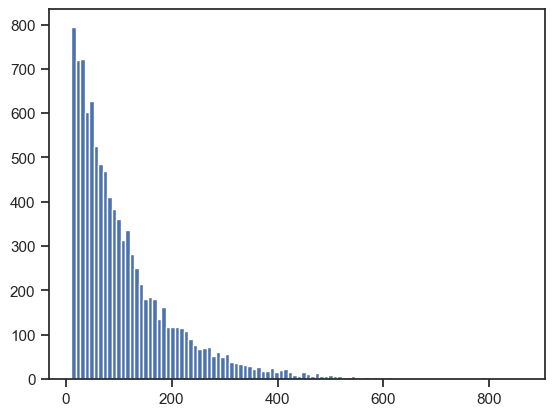

KstestResult(statistic=0.0099, pvalue=0.7112026399498019, statistic_location=28.264200142512415, statistic_sign=1)

In [16]:
import scipy.stats as stats
from collections import Counter
expected_data = (stats.expon.rvs(scale = 109.84, size = 10000)/1.1) + min(df['Call duration (sec)'])
plt.hist(expected_data, bins= 100)
plt.show()
stats.kstest(df['Call duration (sec)'],expected_data)

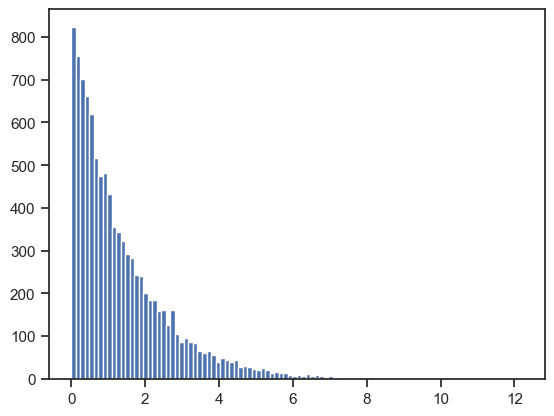

KstestResult(statistic=0.0103, pvalue=0.6637453476707832)

In [268]:
import scipy.stats as stats
from collections import Counter
expected_data = stats.expon.rvs(scale = 109.36, size = 10000)
plt.hist(expected_data, bins= 100)
plt.show()
stats.kstest(df['call'], expected_data)

In [30]:
df_percentCallsDropped = pd.read_csv("../SimulationAndModel/percentCallsDropped.csv")
df_percentCallsBlocked = pd.read_csv("../SimulationAndModel/percentCallsBlocked.csv")
df_clock = pd.read_csv("../SimulationAndModel/clock.csv")
df_percentCallsDroppedFCA = pd.read_csv("../SimulationAndModel/percentCallsDroppedFCA.csv")
df_percentCallsBlockedFCA = pd.read_csv("../SimulationAndModel/percentCallsBlockedFCA.csv")
df_clockFCA = pd.read_csv("../SimulationAndModel/clockFCA.csv")

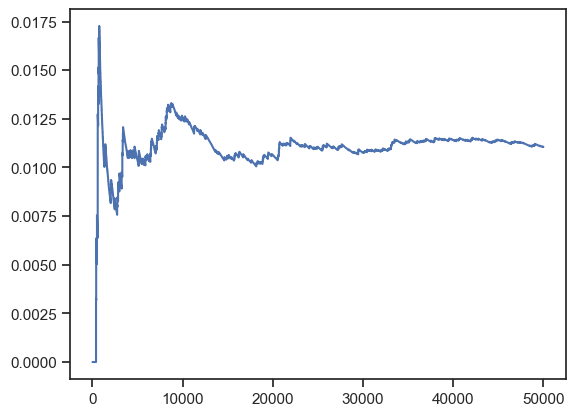

In [31]:
fig,ax = plt.subplots(1)
ax.plot(df_clock, df_percentCallsDropped)

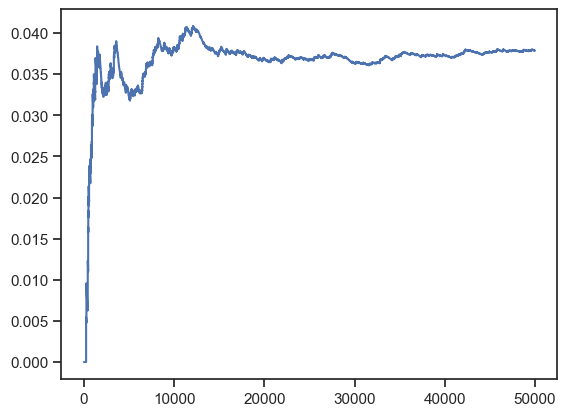

In [32]:
fig,ax = plt.subplots(1)
ax.plot(df_clock, df_percentCallsBlocked)

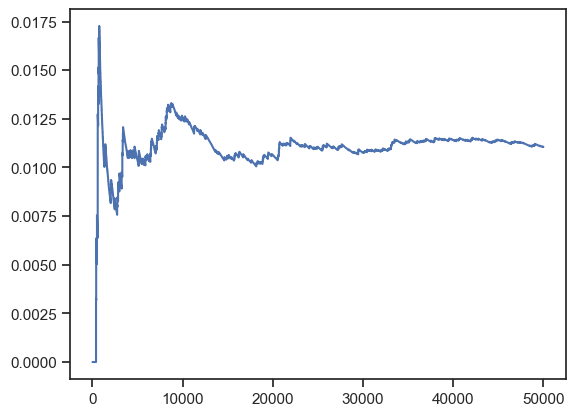

In [33]:
fig,ax = plt.subplots(1)
ax.plot(df_clockFCA, df_percentCallsDroppedFCA)

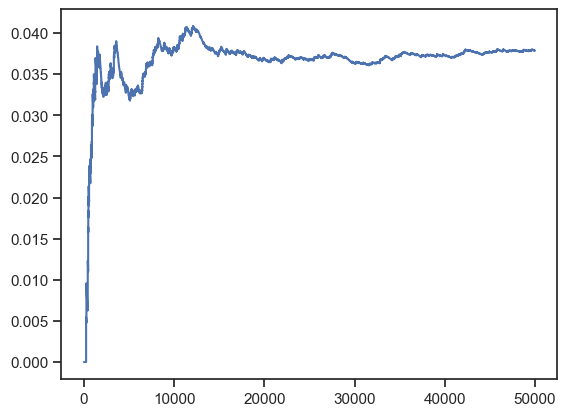

In [36]:
fig,ax = plt.subplots(1)
ax.plot(df_clockFCA, df_percentCallsBlockedFCA)